# Modeling Extremes - From Scratch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Data

In [3]:
data_url = "https://raw.githubusercontent.com/georgebv/pyextremes-notebooks/master/data/battery_wl.csv"

data = pd.read_csv(data_url, index_col=0, parse_dates=True).squeeze()
data.describe()

count    809903.000000
mean         -0.119026
std           0.533992
min          -2.122000
25%          -0.558000
50%          -0.111000
75%           0.316000
max           3.417000
Name: Water Elevation [m NAVD88], dtype: float64

## Clean Data

In [4]:
# sort ascending
data = data.sort_index(ascending=True)
# change type
data = data.astype(float)
# drop all nana
data = data.dropna()
# select start time - 1925
data = data.loc[pd.to_datetime("1925"):]
# # rescale time
# data = data  - (data.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

# data.describe()

In [5]:
data

Date-Time (GMT)
1926-11-20 05:00:00   -0.598
1926-11-20 06:00:00   -0.964
1926-11-20 07:00:00   -1.238
1926-11-20 08:00:00   -1.238
1926-11-20 09:00:00   -0.995
                       ...  
2020-03-31 19:00:00    0.644
2020-03-31 20:00:00    0.498
2020-03-31 21:00:00    0.253
2020-03-31 22:00:00    0.005
2020-03-31 23:00:00   -0.118
Name: Water Elevation [m NAVD88], Length: 796751, dtype: float64

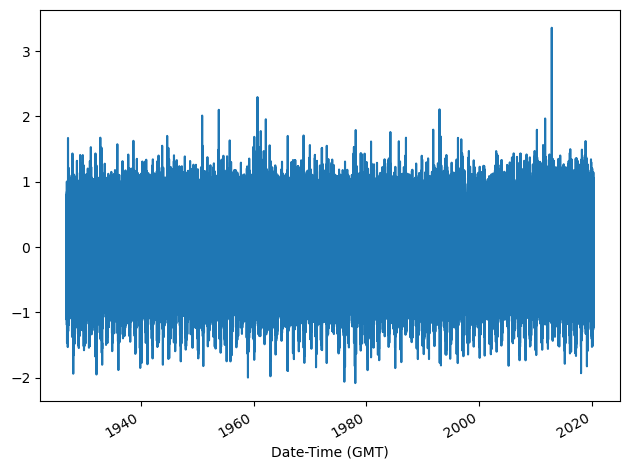

In [4]:
fig, ax = plt.subplots()

data.plot(ax=ax)

plt.tight_layout()
plt.show()

## Extract Extreme Values

In [7]:
from pyextremes import get_extremes, get_return_periods
from pyextremes.plotting import plot_extremes

#### Extract Extreme Values

In [8]:
extremes_method = "BM"
block_size = "365.2425D"
extremes_type = "high"
extremes = get_extremes(
    data, 
    method=extremes_method,
    extremes_type=extremes_type, 
    block_size=block_size,
)

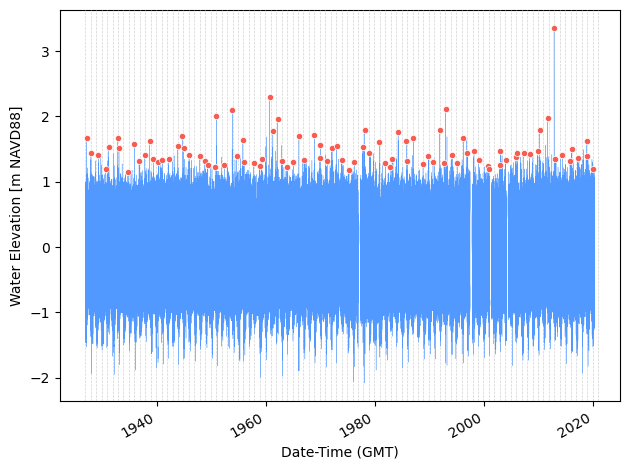

In [9]:
fig, ax = plt.subplots()

plot_extremes(
    ax=ax,
    ts=data,
    extremes=extremes,
    extremes_method=extremes_method,
    extremes_type=extremes_type, 
    block_size=block_size,
)

plt.tight_layout()
plt.show()

## Model

## Diagnostics

In [28]:
return_periods = get_return_periods(
    ts=data,
    extremes=extremes,
    extremes_method=extremes_method,
    extremes_type=extremes_type,
    block_size=block_size,
    return_period_size=block_size,
    plotting_position="weibull",
)
return_periods.sort_values("return period", ascending=False).head()


,Water Elevation [m NAVD88],exceedance probability,return period
Date-Time (GMT),,,
2012-10-30 01:00:00,3.357218,0.010526,95.000000
1960-09-12 18:00:00,2.295832,0.021053,47.500000
1992-12-11 14:00:00,2.108284,0.031579,31.666667
1953-11-07 12:00:00,2.101487,0.042105,23.750000
1950-11-25 14:00:00,2.012957,0.052632,19.000000


In [ ]:
plot_return_values(
    observed_return_values=
)